<a href="https://colab.research.google.com/github/drhoffma/HarperIDEAShopCVCC/blob/main/lessons/06_DL_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://github.com/drhoffma/HarperIDEAShopCVCC/blob/main/colab_template/header_image.png?raw=true)

# Welcome to **Harper College's IDEAShop** curriculum!

**Course Title:** *Computer Vision, Cameras, & Code*

**Quick Links:** [Homepage](https://tinyurl.com/harpercv-home) | [Syllabus](https://tinyurl.com/harpercv-syllabus) | [Blackboard](#) | [Instructor](https://davidrhoffman.net)

***Terms of use:*** *This course is public domain. If you'd like to use content from this course, please request consent by [contacting Harper College MakerSpace](https://www.harpercollege.edu/maker/contact/index.php).*

---

# Object Detection

## Pre-Trained MobileNet SSD

In [2]:
# mount your google drive (confirm via the link)
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


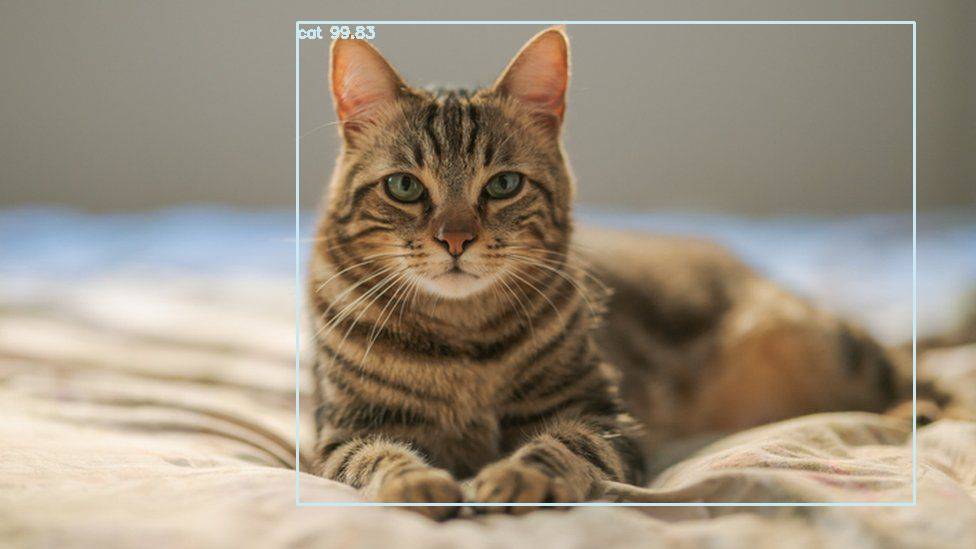

In [10]:
# code playground

# imports
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# settings dictionary
settings = {
    "image": "gdrive/My Drive/Colab Notebooks/cat.jpg",
    # "image": "gdrive/My Drive/Colab Notebooks/farm.jpg",
    # "image": "gdrive/My Drive/Colab Notebooks/obama_family.jpg",
    
    "prototxt": "gdrive/My Drive/Colab Notebooks/MobileNetSSD_deploy.prototxt.txt",
    "model": "gdrive/My Drive/Colab Notebooks/MobileNetSSD_deploy.caffemodel",
    "confidence_threshold": 0.2
}

# define our classes of data
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
	"bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
	"dog", "horse", "motorbike", "person", "pottedplant", "sheep",
	"sofa", "train", "tvmonitor"]
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

# (1) load our model
model = cv2.dnn.readNetFromCaffe(settings["prototxt"], settings["model"])

# (2) load an image
image = cv2.imread(settings["image"])

# (3) preprocess the image
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)

# (4) perform inference (make a prediction)
model.setInput(blob)
detections = model.forward()  # analagous to "model.predict()"

# (5) parse the detections; extract the class & confidence; draw a box around the object

# loop over the detections
for i in np.arange(0, detections.shape[2]):
  # extract the confidence
  confidence = detections[0, 0, i, 2]

  # filter for confidence values that meet the threshold
  if confidence < settings["confidence_threshold"]:
    continue
  
  # extract the index of the class label
  idx = int(detections[0, 0, i, 1])

  # set the class label based on the index
  label = CLASSES[idx] + " {:.2f}".format(confidence * 100)

  # annotate the image with a rectangle
  box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
  (x1, y1, x2, y2) = box.astype("int")
  cv2.rectangle(image, (x1, y1), (x2, y2), COLORS[idx], 2)

  # annotate the image with the class label & confidence
  y = y1 - 15 if y1 - 15 > 15 else y1 + 15
  cv2.putText(image, label, (x1, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)

# display the result
cv2_imshow(image)



